# Import Dependencies

In [1]:
!pip install tweepy

In [2]:
!pip install textblob

In [3]:
import tweepy as tw
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re

from textblob import TextBlob

# Authenticate to Twitter API

In [4]:
# Save keys
bearer_token = ''        # Introduce your bearer token
consumer_key = ''        # Introduce your API key
consumer_secret = ''     # Introduce your API key secret
access_token = ''        # Introduce your Acces token
access_token_secret = '' # Introduce your Acces token secret

In [5]:
client = tw.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret,
                  access_token=access_token, access_token_secret=access_token_secret)

# Get Tweets
In this example we will perform a sentiment analysis on the video game League of Legends but it could be done on any other topic.

In [6]:
hashtag = '#LeagueOfLegends'
query = client.search_recent_tweets(query=hashtag, max_results=100)

In [7]:
tweets = [{'Tweet':tweet['text']} for tweet in query[0]]

In [8]:
print(tweets)

[{'Tweet': '2023 intentando usar esta red social... Para empezar voy 4 - 1 en las placements del lol 😗\n#LeagueOfLegends'}, {'Tweet': 'RT @DogSurplus: Pantheon🍞\n\nSpeedpainting\n https://t.co/o0doQWEOpN \n#lol #LeagueOfLegends #ArtofLegends https://t.co/pdv4JPYmng'}, {'Tweet': 'RT @Capta1n_Irel1a: Another sketch 🥀🍃\n#Ahri #Ahriasu #LeagueOfLegends #fanart https://t.co/7KHMBKnu0l'}, {'Tweet': 'RT @that_maskey: Caitlyn strip game starts now, go!\n\n4K: https://t.co/TU2n0lIz3w\nDownload: https://t.co/s1XKPIcBl7\n\nCaitlyn model by @Memz3…'}, {'Tweet': 'RT @that_maskey: Caitlyn strip game starts now, go!\n\n4K: https://t.co/TU2n0lIz3w\nDownload: https://t.co/s1XKPIcBl7\n\nCaitlyn model by @Memz3…'}, {'Tweet': 'RT @odeko_yma: A message that every jungler has to the toplaner💕\n\n💖💖💖\n\n#Kayn #Sett #LeagueOfLegends #LeagueOfLegendsFanArt https://t.co/3lZ…'}, {'Tweet': 'RT @Koyamamichiru: You got me~\n#LeagueOfLegends https://t.co/3hN18AvGOf'}, {'Tweet': 'RT @KakitoOficial: La cinemática de #

In [9]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet
0,2023 intentando usar esta red social... Para e...
1,RT @DogSurplus: Pantheon🍞\n\nSpeedpainting\n h...
2,RT @Capta1n_Irel1a: Another sketch 🥀🍃\n#Ahri #...
3,RT @that_maskey: Caitlyn strip game starts now...
4,RT @that_maskey: Caitlyn strip game starts now...


# Prepare Tweets

In [10]:
def clean_tw(tw):
    tw = re.sub('#LeagueOfLegends', 'LeagueOfLegends', tw) # Remove the '#' from the hashtag
    tw = re.sub('#[A-Za-z0-9]+', '', tw)                   # Remove any other hashtag
    tw = re.sub('\\n', '', tw)                             # Remove '\\n' string
    tw = re.sub('https?:\/\/\S+', '', tw)                  # Remove hyperlinks
    if tw[0:2] == 'RT':
        end_index = tw.find(':') + 1
        tw = tw[end_index:]                                # Remove the RT part from the tweet
    return tw

In [11]:
df['Cleaned Tweet'] = df['Tweet'].apply(clean_tw)

df.head()

,Tweet,Cleaned Tweet
0,2023 intentando usar esta red social... Para e...,2023 intentando usar esta red social... Para e...
1,RT @DogSurplus: Pantheon🍞\n\nSpeedpainting\n h...,Pantheon🍞Speedpainting LeagueOfLegends
2,RT @Capta1n_Irel1a: Another sketch 🥀🍃\n#Ahri #...,Another sketch 🥀🍃 LeagueOfLegends
3,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model..."
4,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model..."


In [12]:
def get_subjetivity(tw):
    return TextBlob(tw).sentiment.subjectivity

def get_polarity(tw):
    return TextBlob(tw).sentiment.polarity

In [13]:
df['Subjectivity'] = df['Cleaned Tweet'].apply(get_subjetivity)
df['Polarity'] = df['Cleaned Tweet'].apply(get_polarity)

df.head()

,Tweet,Cleaned Tweet,Subjectivity,Polarity
0,2023 intentando usar esta red social... Para e...,2023 intentando usar esta red social... Para e...,0.255556,0.277778
1,RT @DogSurplus: Pantheon🍞\n\nSpeedpainting\n h...,Pantheon🍞Speedpainting LeagueOfLegends,0.000000,0.000000
2,RT @Capta1n_Irel1a: Another sketch 🥀🍃\n#Ahri #...,Another sketch 🥀🍃 LeagueOfLegends,0.000000,0.000000
3,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model...",0.400000,-0.400000
4,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model...",0.400000,-0.400000


In [14]:
def get_sentiment(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [15]:
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

df.head()

,Tweet,Cleaned Tweet,Subjectivity,Polarity,Sentiment
0,2023 intentando usar esta red social... Para e...,2023 intentando usar esta red social... Para e...,0.255556,0.277778,Positive
1,RT @DogSurplus: Pantheon🍞\n\nSpeedpainting\n h...,Pantheon🍞Speedpainting LeagueOfLegends,0.000000,0.000000,Neutral
2,RT @Capta1n_Irel1a: Another sketch 🥀🍃\n#Ahri #...,Another sketch 🥀🍃 LeagueOfLegends,0.000000,0.000000,Neutral
3,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model...",0.400000,-0.400000,Negative
4,RT @that_maskey: Caitlyn strip game starts now...,"Caitlyn strip game starts now, go!4K: model...",0.400000,-0.400000,Negative


# Visualize Results

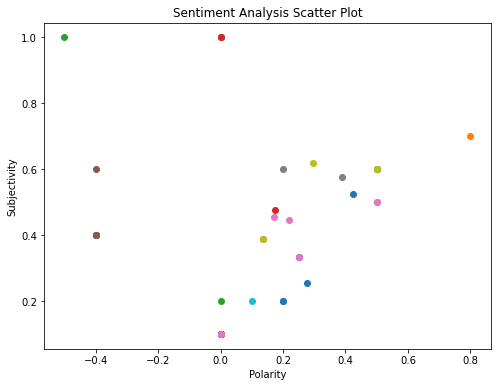

In [16]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i])
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

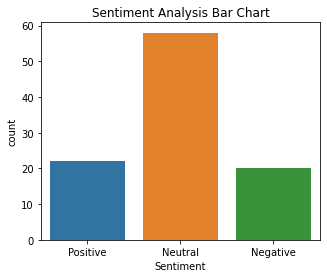

In [17]:
plt.figure(figsize=(5,4))

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment')
plt.title('Sentiment Analysis Bar Chart')
plt.show()